In [1]:
import pandas as pd
import matplotlib

In [2]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Display the first few rows
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Overview of the dataset
print(titanic.info())

# Summary statistics for numerical columns
print(titanic.describe())

# Checking for missing values
print(titanic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
# Select specific columns
selected_columns = titanic[['Name', 'Sex', 'Age', 'Survived']]
print(selected_columns.head())

                                                Name     Sex   Age  Survived
0                            Braund, Mr. Owen Harris    male  22.0         0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0         1
2                             Heikkinen, Miss. Laina  female  26.0         1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0         1
4                           Allen, Mr. William Henry    male  35.0         0


In [5]:
# Fill missing age values with the median
median_age = titanic['Age'].median()
titanic['Age'] = titanic['Age'].fillna(median_age)

# Drop rows with missing Embarked values
titanic = titanic.dropna(subset=['Embarked'])

print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [6]:
# Remove duplicate rows
titanic = titanic.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(titanic)}")

Number of rows after removing duplicates: 889


In [7]:
# Survival rate by gender
survival_by_gender = titanic.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


In [8]:
# Average age and fare by class
class_stats = titanic.groupby('Pclass')[['Age', 'Fare']].mean()
print(class_stats)

              Age       Fare
Pclass                      
1       36.688879  84.193516
2       29.765380  20.662183
3       25.932627  13.675550


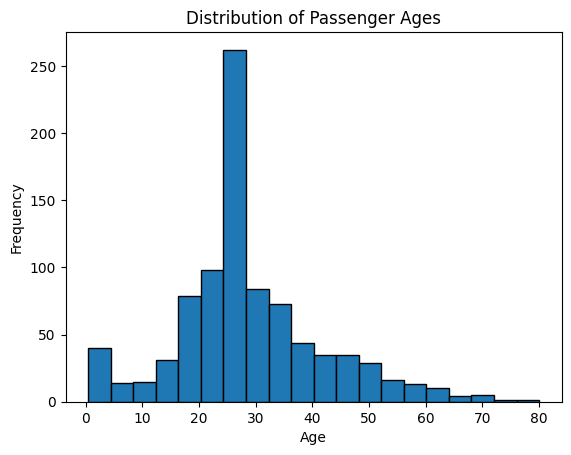

In [9]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(titanic['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

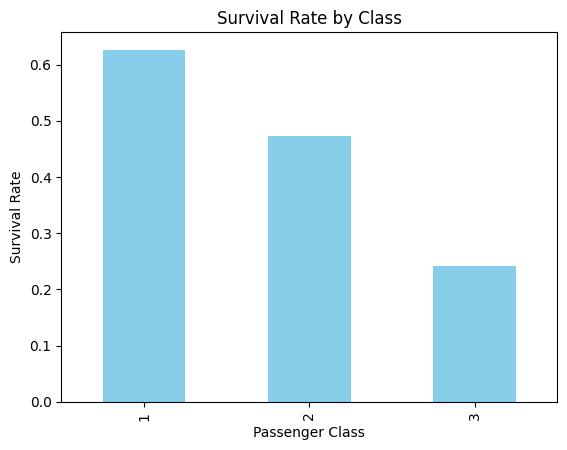

In [10]:
# Survival rate by class
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()

# Plot bar chart
survival_by_class.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [11]:
# Example: Merging two DataFrames
extra_data = pd.DataFrame({
    'PassengerId': [1, 2, 3],
    'CabinType': ['A', 'B', 'C']
})

merged_data = pd.merge(titanic, extra_data, on='PassengerId', how='left')
print(merged_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked CabinType  
0      0         A/5 21171   7.2500   NaN        S         A  
1      0          PC 17599  71.2833   C85        C         B  
2      0  STON/O2. 3101282   7.9250   NaN        S         C  
3      0            113803  53.1000  C123        S       NaN  
4    

In [12]:
# Create a new column based on a condition
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

titanic['AgeGroup'] = titanic['Age'].apply(age_group)
print(titanic[['Age', 'AgeGroup']].head())

    Age AgeGroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult
